$\bullet$ v_fluc is w_fluc

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from multiprocessing import Pool

from Helper_Code import *

Uploading the Dataset

In [2]:
# uploading the Complete Dataset
DataFrames = UploadDataSet("dataframes_list.pkl.gz")

# uploading the 'u_fluc' and 'w_fluc' Dataset for all 18000 points
TS_vfluc_all = UploadDataSet("wfluc_TS_Allpoints_Full.pkl.gz")
TS_ufluc_all = UploadDataSet("ufluc_TS_Allpoints_Full.pkl.gz")

# Vorticity at all points
TS_vor_all = UploadDataSet("vor_TS_Allpoints_Full.pkl.gz")
TS_vor_fluc_all = UploadDataSet("vor_fluc_TS_Allpoints_Full.pkl.gz")

# Loading the Computed MS_u_fluc__MS_w_fluc__MS_u_fluc_w_fluc
df_list = UploadDataSet('MS_u_fluc__w_fluc__u_fluc_w_fluc__vor_fluc.pkl.gz')

In [3]:
TS_vor_fluc_all

,vor_fluc_0,vor_fluc_1,vor_fluc_2,vor_fluc_3,vor_fluc_4,vor_fluc_5,vor_fluc_6,vor_fluc_7,vor_fluc_8,vor_fluc_9,...,vor_fluc_17990,vor_fluc_17991,vor_fluc_17992,vor_fluc_17993,vor_fluc_17994,vor_fluc_17995,vor_fluc_17996,vor_fluc_17997,vor_fluc_17998,vor_fluc_17999
0,-232.321543,-196.192245,-239.550979,-265.035398,-229.555309,-230.062757,-355.610763,-426.50398,-440.610431,-447.050735,...,1105.112126,1136.578077,1143.197465,993.272743,285.409852,51.474935,-225.439519,-550.544841,-917.595723,-601.84301
1,-672.957543,-449.403245,-386.386979,-237.176398,-187.007309,-261.779757,-324.419763,-222.33798,-172.857431,-158.053735,...,-25.518874,-20.864923,-151.170535,178.098443,91.527362,-123.657865,-320.573519,-292.594841,-739.582723,-803.63701
2,-155.561043,-241.267245,-279.504979,-265.120398,-295.039309,-360.241757,-336.550763,-323.58098,-287.066431,-206.439735,...,-918.297874,-1136.431923,-1147.182535,-1498.344257,-1603.042148,-664.023865,-280.516519,-1084.407841,-887.105723,-623.57901
3,-158.587543,-177.663245,-241.730979,-220.376398,-213.326309,-114.106357,51.924137,143.58902,179.071569,242.986265,...,-734.252874,-772.671923,-726.733535,-761.117257,-733.942148,-891.076865,-991.364519,-783.892841,-832.928723,-800.14701
4,292.984457,150.721755,52.902021,22.141802,44.804591,154.553243,155.350237,97.43702,115.846569,139.689265,...,-483.651874,-775.706923,-989.742535,-1041.704257,-842.033148,-532.715865,84.634081,41.200159,167.062187,358.92699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,215.721457,103.500755,49.057721,0.788202,-16.876009,-104.488757,-140.265763,-119.55128,-175.666431,-195.592735,...,-618.781874,-679.110923,-715.333535,-586.754257,-669.594148,-488.650865,-204.263519,-98.771841,309.206277,1090.71699
796,-293.772543,-88.063845,-3.423779,16.224902,-106.664609,-174.168757,-125.111063,-94.20428,-63.939131,6.156465,...,-167.693874,-152.683923,-149.993535,-171.581257,-244.177148,-325.987865,-273.512519,-78.083841,-43.443723,46.26199
797,-194.575543,-222.044245,-260.246979,-320.251398,-298.479309,-236.360757,-199.732763,-225.59498,-195.348431,-186.865735,...,-140.232874,-93.398923,-237.531535,-281.332257,-303.470148,-269.873865,-224.176519,-41.946841,-20.253723,101.58809
798,-305.122543,-237.555245,-244.766979,-288.647398,-185.215309,-84.862757,-121.470163,-186.33798,-202.442431,-197.272735,...,-820.070874,-895.640923,-552.882535,-377.705257,-225.606148,-54.263865,-26.260519,-95.590841,-32.177723,84.33099


In [4]:
vor_mean_all = (TS_vor_all.sum()/800).reset_index(drop=True)
vor_mean_all

0         57.537543
1         43.086245
2         34.938979
3         27.799398
4         34.221309
            ...    
17995   -117.143135
17996   -142.335481
17997   -159.902159
17998   -157.654277
17999   -151.052990
Length: 18000, dtype: float64

NOTE: Y here is Z in reality

Extracting the Locations (X,Y)

In [5]:
X, Y = IndexToLocation(DataFrames, np.arange(18000))
X = X.values.reshape(150, 120)
Y = Y.values.reshape(150, 120)

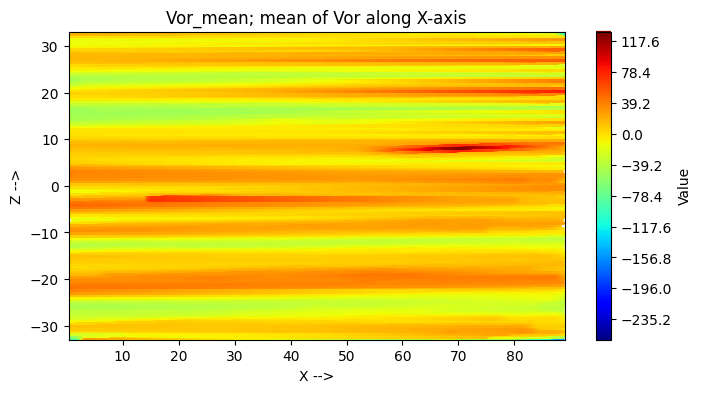

In [6]:
# Creating contour plot of vor_mean
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, vor_mean_all.values.reshape(150, 120), cmap='jet', levels = 1000)
plt.colorbar(contour, label='Value')
plt.title('Vor_mean; mean of Vor along X-axis')
plt.xlabel('X -->')
plt.ylabel('Z -->')
plt.grid(True)
plt.show()

$\bullet$ Selecting a Particular Location (as per your wish)

In [130]:
index = 11374#np.random.randint(12000, 18000)
print(f"index = {index}")
df = df_list[index]

index = 11374


In [131]:
df

,MS_u_fluc,MS_w_fluc,MS_u_fluc_w_fluc,MS_vorfluc_vorfluc
0,0.404940,0.029078,0.009146,77522.619265
1,0.430849,0.043954,0.013234,87411.977291
2,0.470608,0.070522,0.022915,100274.658269
3,0.564228,0.114457,0.031368,137905.221184
4,0.652387,0.161286,0.040807,168942.065458
...,...,...,...,...
96,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN


The Reference U_0 (Make sure that it is same as the DataPrep Code)

In [132]:
# A reference Velocity
U_0 = DataFrames[800]["Umean"].mean()
print(U_0.round(5))

3.33294


Plotting the Time Series of u_fluc for the above selected point

In [133]:
VarName = "w_fluc"

# TS_var1 --> has ufluc
TS_var1 = TS_ufluc_all[f"ufluc_{index}"]
# TS_var2 --> has wfluc
TS_var2 = TS_vfluc_all[f"wfluc_{index}"]

# TS_var3 --> has vor_fluc
TS_var3 = TS_vor_fluc_all[f"vor_fluc_{index}"]

pts = IndexToLocation(DataFrames, index)

$\bullet$ Selecting the critical w_fluc ::  

NOTE: It is parametrized using alpha in [0, 1]

In [134]:
# select the alpha
alpha = 0.1
w_fluc_critical = (alpha * U_0).round(5)

Ploting the Computed Results

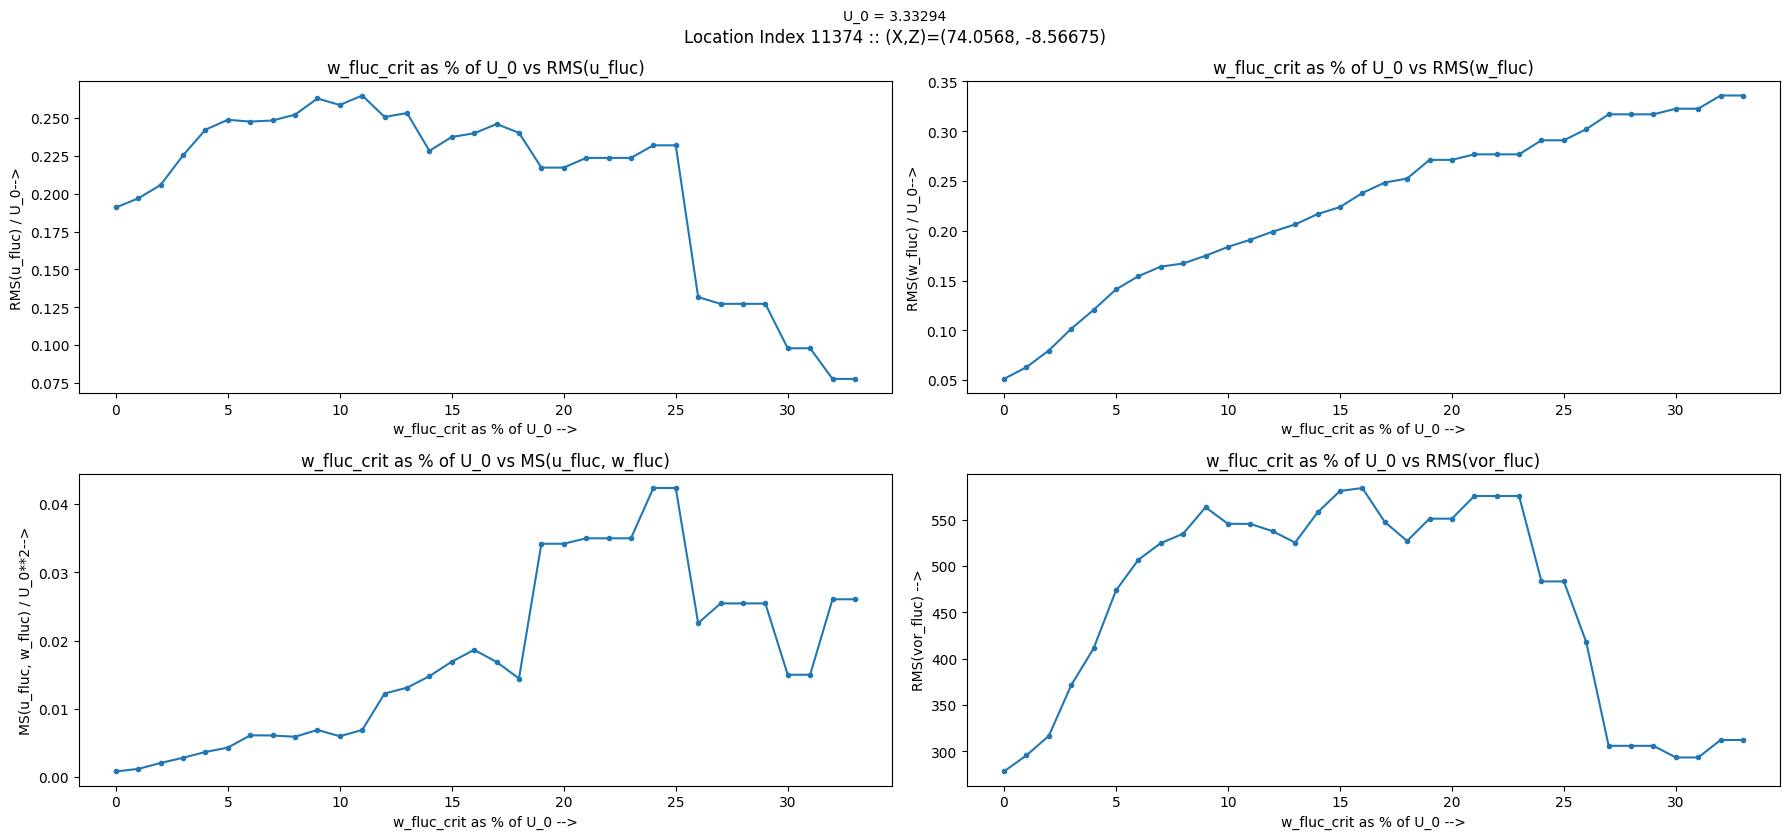

In [135]:
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 8))

# Plot RMS(u) vs. w_crit
axes[0, 0].plot(np.arange(0, 1.01, 0.01)*100, df["MS_u_fluc"] ** 0.5 / U_0, marker='.')
axes[0, 0].set_xlabel("w_fluc_crit as % of U_0 -->")
axes[0, 0].set_ylabel("RMS(u_fluc) / U_0-->")
axes[0, 0].set_title(f"w_fluc_crit as % of U_0 vs RMS(u_fluc)")

# Plot RMS(w) vs. w_crit
axes[0, 1].plot(np.arange(0, 1.01, 0.01)*100, df["MS_w_fluc"] ** 0.5 / U_0, marker='.')
axes[0, 1].set_xlabel("w_fluc_crit as % of U_0 -->")
axes[0, 1].set_ylabel("RMS(w_fluc) / U_0-->")
axes[0, 1].set_title(f"w_fluc_crit as % of U_0 vs RMS(w_fluc)")

# Plot MS_u_w vs. w_crit
axes[1, 0].plot(np.arange(0, 1.01, 0.01)*100, df["MS_u_fluc_w_fluc"]/ U_0**2, marker='.')
axes[1, 0].set_xlabel("w_fluc_crit as % of U_0 -->")
axes[1, 0].set_ylabel("MS(u_fluc, w_fluc) / U_0**2-->")
axes[1, 0].set_title(f"w_fluc_crit as % of U_0 vs MS(u_fluc, w_fluc)")

# Plot MS_vor_fluc vs. w_crit
axes[1, 1].plot(np.arange(0, 1.01, 0.01)*100, df["MS_vorfluc_vorfluc"]**0.5, marker='.')
axes[1, 1].set_xlabel("w_fluc_crit as % of U_0 -->")
axes[1, 1].set_ylabel("RMS(vor_fluc) -->")
axes[1, 1].set_title(f"w_fluc_crit as % of U_0 vs RMS(vor_fluc)")

# Adjust layout
plt.tight_layout()

# Add a common title
fig.suptitle(f'Location Index {index} :: (X,Z)={IndexToLocation(DataFrames, index)}', y= 1.02)

# Add a comment common to all plots
fig.text(0.5, 1.03, f'U_0 = {U_0.round(5)}', ha='center')

# Show the plot
plt.show()


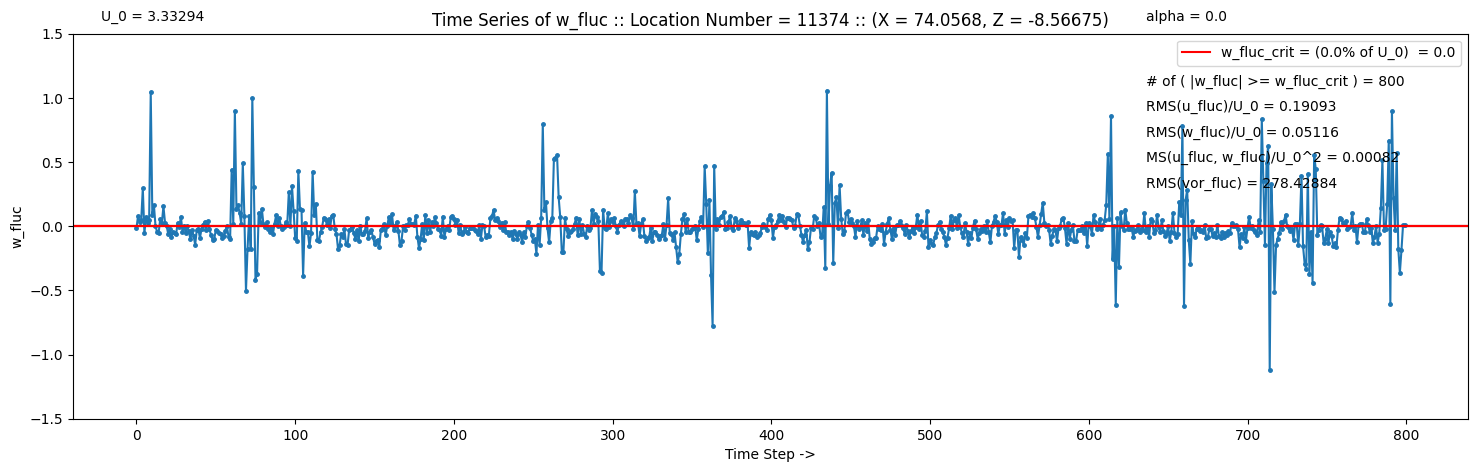

In [136]:
# Define the range of alphas
alphas = np.linspace(0, 1, 101)

# Create a function to update the plot for each alpha
def update_plot(alpha):
    plt.clf()  # Clear the current figure
    
    
    w_fluc_critical = (alpha * U_0).round(5)
    
    plt.text(10, 1.6, f'U_0 = {U_0.round(5)}', ha='center')
    
    plt.text(636, 1.6, f'alpha = {alpha}')
    
    num_elements = (TS_var2.abs() >= w_fluc_critical).sum()
    
    plt.text(636, 1.1, f'# of ( |w_fluc| >= w_fluc_crit ) = {num_elements}')
    plt.text(636, 0.9, f'RMS(u_fluc)/U_0 = {((df["MS_u_fluc"][int(alpha*100)] ** 0.5)/U_0) . round(5)}')
    plt.text(636, 0.7, f'RMS(w_fluc)/U_0 = {((df["MS_w_fluc"][int(alpha*100)] ** 0.5)/U_0). round(5)}')
    plt.text(636, 0.5, f'MS(u_fluc, w_fluc)/U_0^2 = {((df["MS_u_fluc_w_fluc"][int(alpha*100)])/U_0**2). round(5)}')
    plt.text(636, 0.3, f'RMS(vor_fluc) = {(df["MS_vorfluc_vorfluc"][int(alpha*100)] ** 0.5).round(5)}')


    plt.plot(TS_var2, marker='.', markersize=5, linestyle='-')

    plt.axhline(y=0, color='k')
    plt.axhline(y=w_fluc_critical, color='r')    
    plt.axhline(y=-w_fluc_critical, color='r', label=f'w_fluc_crit = ({(alpha*100).round(1)}% of U_0)  = {w_fluc_critical.round(5)}')

    plt.title(f"Time Series of {VarName} :: Location Number = {index} :: (X = {pts[0]}, Z = {pts[1]})")
    plt.ylabel(f"{VarName}")
    plt.xlabel("Time Step ->")
    plt.legend()

    plt.ylim(-1.5, 1.5)
    
# Set up the figure and axis for the animation
fig = plt.figure(figsize=(18, 5))

ani = animation.FuncAnimation(fig, update_plot, frames=alphas, repeat=False)

# Save the animation as an .mp4 file
ani.save(f'Animations/alpha_variation_Location_No_{index}.mp4', fps=2)


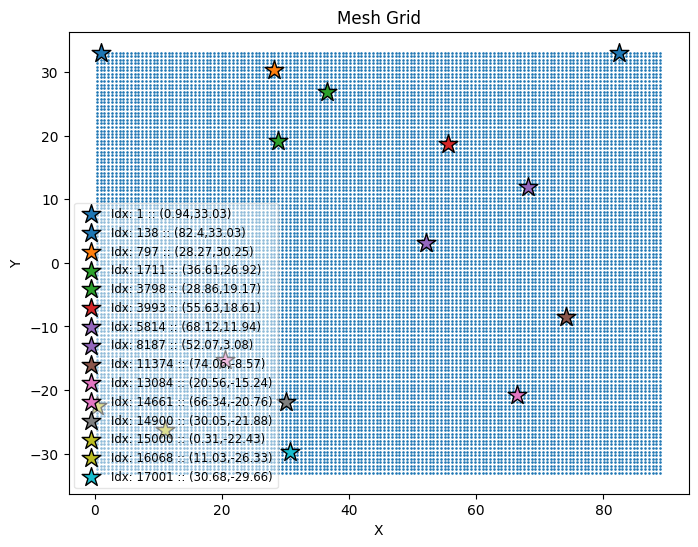

In [127]:
MeshViz2(DataFrames, [1, 138, 797, 1711, 3798, 3993, 5814, 8187, 11374, 13084, 14661, 14900, 15000, 16068, 17001])

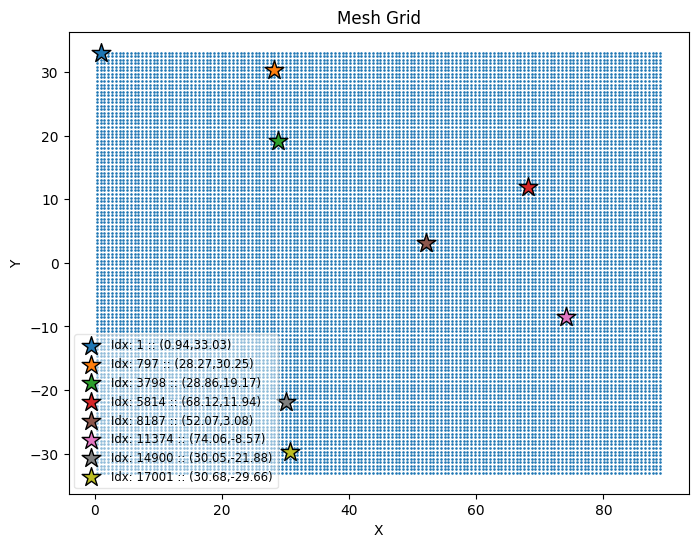

In [129]:
MeshViz2(DataFrames, [1, 797, 3798, 5814, 8187, 11374, 14900, 17001])